# Normalize US covid cases and deaths by population

* input: csv of april covid cases/deaths, dataset of state names and population

## Section 1: merging datasets

In [1]:
import pandas as pd 
population = pd.read_csv('us_population_abbreviated_state_name.csv')
print(population)

                   State  population_estimate state_abbreviation
0                 Alaska               734002                 AK
1                Alabama              4908621                 AL
2               Arkansas              3038999                 AR
3                Arizona              7378494                 AZ
4             California             39937489                 CA
5               Colorado              5845526                 CO
6            Connecticut              3563077                 CT
7   District of Columbia               720687                 DC
8               Delaware               982895                 DE
9                Florida             21992985                 FL
10               Georgia             10736059                 GA
11                Hawaii              1412687                 HI
12                  Iowa              3179849                 IA
13                 Idaho              1826156                 ID
14              Illinois 

In [2]:
april_covid = pd.read_csv("april_covid_deaths_cases_new.csv") 
print(april_covid)

            date state  tot_cases  new_case  tot_death  new_death
0     04/11/2020    ND        293        15          7          1
1     04/10/2020    MA      20845      1904        599         96
2     04/07/2020    MS       2003        88         67          8
3     04/19/2020    MI      31424       707       2391         84
4     04/14/2020    ND        341        10          9          1
...          ...   ...        ...       ...        ...        ...
1795  04/06/2020    TN       3803       170         65         21
1796  04/26/2020    MD      19487      1721        945         70
1797  04/13/2020   NYC     106813      3605       6182       -537
1798  04/11/2020    OK       1868        74         94          6
1799  04/26/2020    SC       5490       237        174          8

[1800 rows x 6 columns]


In [3]:
merge_covid = april_covid.merge(population,left_on="state", right_on="state_abbreviation")
(merge_covid)

,date,state,tot_cases,new_case,tot_death,new_death,State,population_estimate,state_abbreviation
0,04/11/2020,ND,293,15,7,1,North Dakota,761723,ND
1,04/14/2020,ND,341,10,9,1,North Dakota,761723,ND
2,04/03/2020,ND,173,14,3,0,North Dakota,761723,ND
3,04/05/2020,ND,207,21,3,0,North Dakota,761723,ND
4,04/25/2020,ND,803,55,16,1,North Dakota,761723,ND
...,...,...,...,...,...,...,...,...,...
1525,04/04/2020,NH,621,81,9,2,New Hampshire,1371246,NH
1526,04/01/2020,NH,415,48,4,1,New Hampshire,1371246,NH
1527,04/20/2020,NH,1447,55,42,1,New Hampshire,1371246,NH
1528,04/23/2020,NH,1670,82,51,3,New Hampshire,1371246,NH


In [4]:
merge_covid['normalized_tot_cases'] = merge_covid['tot_cases']/merge_covid['population_estimate']*1000
merge_covid


,date,state,tot_cases,new_case,tot_death,new_death,State,population_estimate,state_abbreviation,normalized_tot_cases
0,04/11/2020,ND,293,15,7,1,North Dakota,761723,ND,0.384654
1,04/14/2020,ND,341,10,9,1,North Dakota,761723,ND,0.447669
2,04/03/2020,ND,173,14,3,0,North Dakota,761723,ND,0.227117
3,04/05/2020,ND,207,21,3,0,North Dakota,761723,ND,0.271752
4,04/25/2020,ND,803,55,16,1,North Dakota,761723,ND,1.054189
...,...,...,...,...,...,...,...,...,...,...
1525,04/04/2020,NH,621,81,9,2,New Hampshire,1371246,NH,0.452873
1526,04/01/2020,NH,415,48,4,1,New Hampshire,1371246,NH,0.302644
1527,04/20/2020,NH,1447,55,42,1,New Hampshire,1371246,NH,1.055245
1528,04/23/2020,NH,1670,82,51,3,New Hampshire,1371246,NH,1.217870


In [5]:
merge_covid['normalized_new_case'] = merge_covid['new_case']/merge_covid['population_estimate']*1000
merge_covid

,date,state,tot_cases,new_case,tot_death,new_death,State,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case
0,04/11/2020,ND,293,15,7,1,North Dakota,761723,ND,0.384654,0.019692
1,04/14/2020,ND,341,10,9,1,North Dakota,761723,ND,0.447669,0.013128
2,04/03/2020,ND,173,14,3,0,North Dakota,761723,ND,0.227117,0.018379
3,04/05/2020,ND,207,21,3,0,North Dakota,761723,ND,0.271752,0.027569
4,04/25/2020,ND,803,55,16,1,North Dakota,761723,ND,1.054189,0.072205
...,...,...,...,...,...,...,...,...,...,...,...
1525,04/04/2020,NH,621,81,9,2,New Hampshire,1371246,NH,0.452873,0.059070
1526,04/01/2020,NH,415,48,4,1,New Hampshire,1371246,NH,0.302644,0.035005
1527,04/20/2020,NH,1447,55,42,1,New Hampshire,1371246,NH,1.055245,0.040110
1528,04/23/2020,NH,1670,82,51,3,New Hampshire,1371246,NH,1.217870,0.059800


In [6]:
merge_covid['normalized_tot_death'] = merge_covid['tot_death']/merge_covid['population_estimate']*1000
merge_covid

,date,state,tot_cases,new_case,tot_death,new_death,State,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case,normalized_tot_death
0,04/11/2020,ND,293,15,7,1,North Dakota,761723,ND,0.384654,0.019692,0.009190
1,04/14/2020,ND,341,10,9,1,North Dakota,761723,ND,0.447669,0.013128,0.011815
2,04/03/2020,ND,173,14,3,0,North Dakota,761723,ND,0.227117,0.018379,0.003938
3,04/05/2020,ND,207,21,3,0,North Dakota,761723,ND,0.271752,0.027569,0.003938
4,04/25/2020,ND,803,55,16,1,North Dakota,761723,ND,1.054189,0.072205,0.021005
...,...,...,...,...,...,...,...,...,...,...,...,...
1525,04/04/2020,NH,621,81,9,2,New Hampshire,1371246,NH,0.452873,0.059070,0.006563
1526,04/01/2020,NH,415,48,4,1,New Hampshire,1371246,NH,0.302644,0.035005,0.002917
1527,04/20/2020,NH,1447,55,42,1,New Hampshire,1371246,NH,1.055245,0.040110,0.030629
1528,04/23/2020,NH,1670,82,51,3,New Hampshire,1371246,NH,1.217870,0.059800,0.037192


In [7]:
merge_covid['normalized_new_death'] = merge_covid['new_death']/merge_covid['population_estimate']*1000
merge_covid

,date,state,tot_cases,new_case,tot_death,new_death,State,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case,normalized_tot_death,normalized_new_death
0,04/11/2020,ND,293,15,7,1,North Dakota,761723,ND,0.384654,0.019692,0.009190,0.001313
1,04/14/2020,ND,341,10,9,1,North Dakota,761723,ND,0.447669,0.013128,0.011815,0.001313
2,04/03/2020,ND,173,14,3,0,North Dakota,761723,ND,0.227117,0.018379,0.003938,0.000000
3,04/05/2020,ND,207,21,3,0,North Dakota,761723,ND,0.271752,0.027569,0.003938,0.000000
4,04/25/2020,ND,803,55,16,1,North Dakota,761723,ND,1.054189,0.072205,0.021005,0.001313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,04/04/2020,NH,621,81,9,2,New Hampshire,1371246,NH,0.452873,0.059070,0.006563,0.001459
1526,04/01/2020,NH,415,48,4,1,New Hampshire,1371246,NH,0.302644,0.035005,0.002917,0.000729
1527,04/20/2020,NH,1447,55,42,1,New Hampshire,1371246,NH,1.055245,0.040110,0.030629,0.000729
1528,04/23/2020,NH,1670,82,51,3,New Hampshire,1371246,NH,1.217870,0.059800,0.037192,0.002188


In [8]:
merge_covid = merge_covid.drop(['state'], axis=1)
merge_covid

,date,tot_cases,new_case,tot_death,new_death,State,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case,normalized_tot_death,normalized_new_death
0,04/11/2020,293,15,7,1,North Dakota,761723,ND,0.384654,0.019692,0.009190,0.001313
1,04/14/2020,341,10,9,1,North Dakota,761723,ND,0.447669,0.013128,0.011815,0.001313
2,04/03/2020,173,14,3,0,North Dakota,761723,ND,0.227117,0.018379,0.003938,0.000000
3,04/05/2020,207,21,3,0,North Dakota,761723,ND,0.271752,0.027569,0.003938,0.000000
4,04/25/2020,803,55,16,1,North Dakota,761723,ND,1.054189,0.072205,0.021005,0.001313
...,...,...,...,...,...,...,...,...,...,...,...,...
1525,04/04/2020,621,81,9,2,New Hampshire,1371246,NH,0.452873,0.059070,0.006563,0.001459
1526,04/01/2020,415,48,4,1,New Hampshire,1371246,NH,0.302644,0.035005,0.002917,0.000729
1527,04/20/2020,1447,55,42,1,New Hampshire,1371246,NH,1.055245,0.040110,0.030629,0.000729
1528,04/23/2020,1670,82,51,3,New Hampshire,1371246,NH,1.217870,0.059800,0.037192,0.002188


In [9]:
# adding a shortened date column
merge_covid['short_date'] = merge_covid.apply(lambda row: int(row['date'][3:5]),axis=1)
merge_covid

,date,tot_cases,new_case,tot_death,new_death,State,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case,normalized_tot_death,normalized_new_death,short_date
0,04/11/2020,293,15,7,1,North Dakota,761723,ND,0.384654,0.019692,0.009190,0.001313,11
1,04/14/2020,341,10,9,1,North Dakota,761723,ND,0.447669,0.013128,0.011815,0.001313,14
2,04/03/2020,173,14,3,0,North Dakota,761723,ND,0.227117,0.018379,0.003938,0.000000,3
3,04/05/2020,207,21,3,0,North Dakota,761723,ND,0.271752,0.027569,0.003938,0.000000,5
4,04/25/2020,803,55,16,1,North Dakota,761723,ND,1.054189,0.072205,0.021005,0.001313,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,04/04/2020,621,81,9,2,New Hampshire,1371246,NH,0.452873,0.059070,0.006563,0.001459,4
1526,04/01/2020,415,48,4,1,New Hampshire,1371246,NH,0.302644,0.035005,0.002917,0.000729,1
1527,04/20/2020,1447,55,42,1,New Hampshire,1371246,NH,1.055245,0.040110,0.030629,0.000729,20
1528,04/23/2020,1670,82,51,3,New Hampshire,1371246,NH,1.217870,0.059800,0.037192,0.002188,23


In [58]:
merge_covid.to_csv(r'normalised_covid_deaths_cases.csv', index = False)

__________________________________________________________________________________________

## Section 2: Creating visualizations

In [10]:
# importung visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


Below we are checking covid cases for april specifically in Colorado

In [11]:
colorado=merge_covid[merge_covid['state_abbreviation']=="CO"]
colorado.sort_values(by='date',inplace=True)
colorado.info()
colorado

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 729 to 738
Data columns (total 13 columns):
date                    30 non-null object
tot_cases               30 non-null int64
new_case                30 non-null int64
tot_death               30 non-null int64
new_death               30 non-null int64
State                   30 non-null object
population_estimate     30 non-null int64
state_abbreviation      30 non-null object
normalized_tot_cases    30 non-null float64
normalized_new_case     30 non-null float64
normalized_tot_death    30 non-null float64
normalized_new_death    30 non-null float64
short_date              30 non-null int64
dtypes: float64(4), int64(6), object(3)
memory usage: 3.3+ KB


,date,tot_cases,new_case,tot_death,new_death,State,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case,normalized_tot_death,normalized_new_death,short_date
729,04/01/2020,3342,376,80,11,Colorado,5845526,CO,0.571719,0.064323,0.013686,0.001882,1
736,04/02/2020,3728,386,97,17,Colorado,5845526,CO,0.637753,0.066033,0.016594,0.002908,2
723,04/03/2020,4173,445,111,14,Colorado,5845526,CO,0.713879,0.076127,0.018989,0.002395,3
722,04/04/2020,4565,392,126,15,Colorado,5845526,CO,0.780939,0.067060,0.021555,0.002566,4
728,04/05/2020,4950,385,140,14,Colorado,5845526,CO,0.846801,0.065862,0.023950,0.002395,5
740,04/06/2020,5172,222,150,10,Colorado,5845526,CO,0.884779,0.037978,0.025661,0.001711,6
739,04/07/2020,5429,257,179,29,Colorado,5845526,CO,0.928744,0.043965,0.030622,0.004961,7
747,04/08/2020,5655,226,193,14,Colorado,5845526,CO,0.967407,0.038662,0.033017,0.002395,8
731,04/09/2020,6202,547,226,33,Colorado,5845526,CO,1.060982,0.093576,0.038662,0.005645,9
730,04/10/2020,6365,163,250,24,Colorado,5845526,CO,1.088867,0.027885,0.042768,0.004106,10


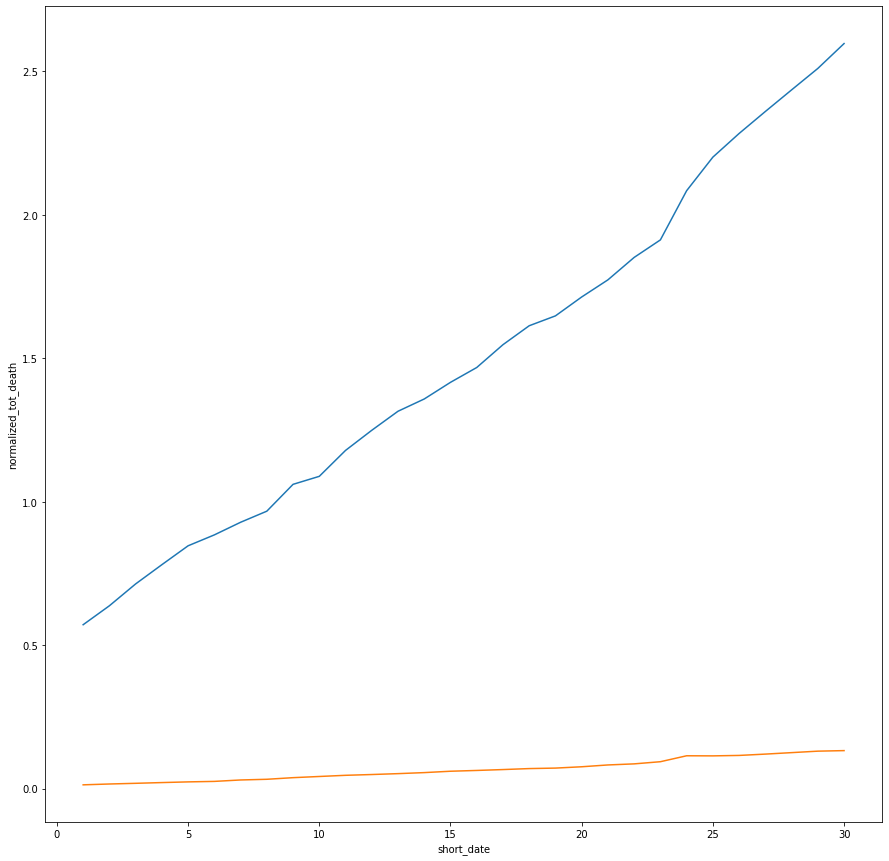

In [12]:
plt.figure(figsize=(15,15))
sns.lineplot(x=colorado['short_date'],y=colorado['normalized_tot_cases'])
sns.lineplot(x=colorado['short_date'],y=colorado['normalized_tot_death'])

To do this for all states we get a list of state abbrevations and use a for loop to simply replace the state name during each iteration

In [13]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
state_names=us_state_abbrev.values()
print(state_names)

dict_values(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY'])


In [14]:
"""
for name in state_names:
  state=merge_covid[merge_covid['state_abbreviation']==name]
  state.plot(x='date',y='normalized_tot_cases')
  plt.figure(figsize=(40, 40))
  plt.savefig('april_covid_{}'.format(name))
  plt.close()
"""

"\nfor name in state_names:\n  state=merge_covid[merge_covid['state_abbreviation']==name]\n  state.plot(x='date',y='normalized_tot_cases')\n  plt.figure(figsize=(40, 40))\n  plt.savefig('april_covid_{}'.format(name))\n  plt.close()\n"

We can also use plotly for some interactive results
* https://plotly.com/python/figure-labels/#manual-labelling-with-graph-objects (used to relabel graphs)

In [15]:
merge_covid.sort_values(by='date',inplace=True)


In [21]:
# covid cases total
fig = px.line(merge_covid, x="short_date", y="normalized_tot_cases", color='state_abbreviation')
fig.update_layout( autosize=False, width=800, height=800)

fig.update_layout(
    title="Normalized total COVID-19 cases per state in the US, April 2020",
    xaxis_title="Date (1/04/2020-30/04/2020)",
    yaxis_title="Total reported COVID-19 cases, normalized for population",
    legend_title="State abbreviation",

)

fig.show()

fig.write_html("state_tot_cases_april.html") #saves interactive plot

In [24]:
# covid deaths total
fig = px.line(merge_covid, x="short_date", y="normalized_tot_death", color='state_abbreviation')
fig.update_layout( autosize=False, width=1000, height=800)

fig.update_layout(
    title="Normalized total COVID-19 deaths per state in the US, April 2020",
    xaxis_title="Date (1/04/2020-30/04/2020)",
    yaxis_title="Total reported COVID-19 deaths, normalized for population",
    legend_title="State abbreviation",

)

fig.show()
fig.write_html("state_tot_deaths_april.html") #saves interactive plot

In [25]:
# covid deaths new
fig = px.line(merge_covid, x="short_date", y="normalized_new_death", color='state_abbreviation')
fig.update_layout( autosize=False, width=800, height=800)
fig.update_layout(
    title="Normalized new COVID-19 deaths per state in the US, April 2020",
    xaxis_title="Date (1/04/2020-30/04/2020)",
    yaxis_title="New reported COVID-19 deaths, normalized for population",
    legend_title="State abbreviation",

)
fig.show()


In [26]:
# covid cases new
fig = px.line(merge_covid, x="short_date", y="normalized_new_case", color='state_abbreviation')
fig.update_layout( autosize=False, width=800, height=1000)
fig.update_layout(
    title="Normalized new COVID-19 cases per state in the US, April 2020",
    xaxis_title="Date (1/04/2020-30/04/2020)",
    yaxis_title="New reported COVID-19 cases, normalized for population",
    legend_title="State abbreviation",

)
fig.show()

We can also get some visualizations of national cases and deaths

Seaborn aggregates the data by default and adds confidence intervals
https://seaborn.pydata.org/generated/seaborn.lineplot.html
* "By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate."


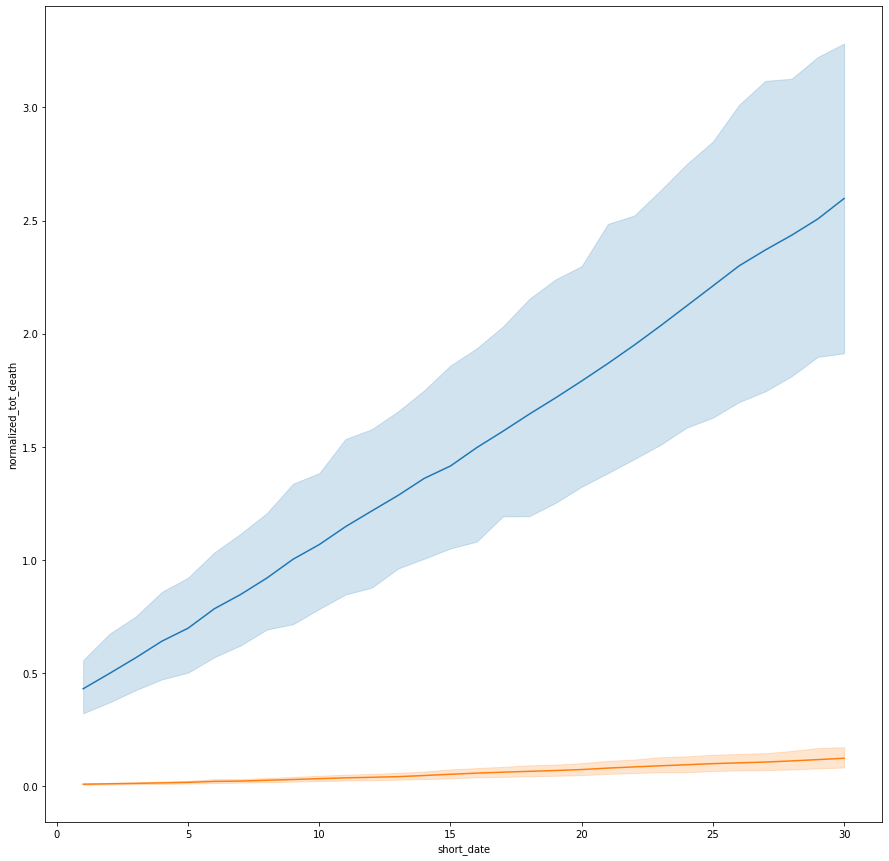

In [27]:
plt.figure(figsize=(15,15))

sns.lineplot(x=merge_covid['short_date'],y=merge_covid['normalized_tot_cases'])
sns.lineplot(x=merge_covid['short_date'],y=merge_covid['normalized_tot_death'])


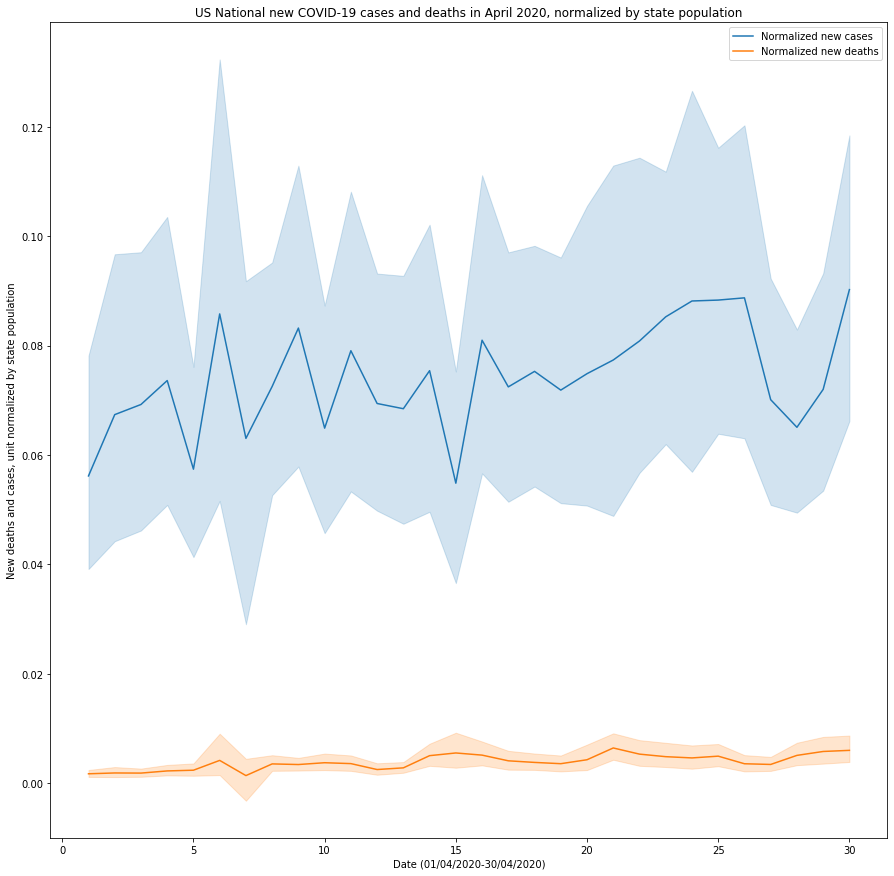

In [30]:
plt.figure(figsize=(15,15))

sns.lineplot(x=merge_covid['short_date'],y=merge_covid['normalized_new_case'])
sns.lineplot(x=merge_covid['short_date'],y=merge_covid['normalized_new_death'])
plt.legend(['Normalized new cases', 'Normalized new deaths'])
plt.xlabel('Date (01/04/2020-30/04/2020)')
plt.ylabel('New deaths and cases, unit normalized by state population')
plt.title('US National new COVID-19 cases and deaths in April 2020, normalized by state population')
plt.savefig("nationwide_new_cases_and_deaths_april")